# Part II - (What loans to invest in ?)
## by (Ivan Gonzalez )


## Key Insights for Presentation

As an advice for future investors: 

Invest in loans or loans that can have a verifiable income source
Invest in loans in the middle middle class
Invest in employeed loans
Invest in loans with a good propser score. 
Do not invest in loans with a poverty class type, 
Do not invest in loans with people that is unemployeed. 
Do not invest in loans with people that is retired.
Do not invest in loans with people that is other.


## Investigation Overview


Prove visually my key insights to anyone. 




## Dataset Overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others that we want to analyse. We want to know what asspects thoes the most secure loans have.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.drop_duplicates(inplace =True)
df = df[df['ProsperScore'].notnull()]
df = df[df['LoanStatus'] == 'Completed']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Completed loans with a verifiable income)

Here we can see that that almost all completed loans comes from borrowers with a verifiable income. We have an aproximate of 17500 completed loans with a verifiable income and aproximatley 2500 completed loans without a verifiable income.


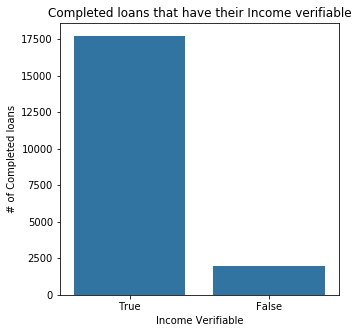

In [3]:
cat_order = df['IncomeVerifiable'].value_counts().index
plt.figure(figsize=[5, 5])
sb.countplot(data = df, x = 'IncomeVerifiable', color = sb.color_palette()[0], order=cat_order)
plt.xlabel('Income Verifiable')
plt.ylabel('# of Completed loans')
plt.title('Completed loans that have their Income verifiable');

## (Completed loans with and without a house)

Here we can observe that we have around 10000 completed loans with a home and around 9000 completed loans without a loan. 
With this data and visualization we can tell that it really does not make the difference between completed the loans or not. 

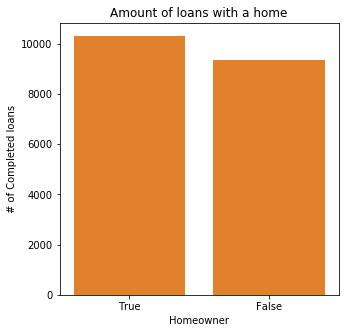

In [4]:
# Check the amount of loans to borrowers that are homeowener
plt.figure(figsize=[5, 5])
base_color = sb.color_palette()[1]
cat_order = df['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color, order=cat_order)
plt.xlabel('Homeowner')
plt.ylabel('# of Completed loans')
plt.title('Amount of loans with a home');

## (Completed loans vs employment status)

Here we can see that the majority of loans are completed by borrowers that are employeed and then the full time. This tell us is better to lend to people that have an employee. 


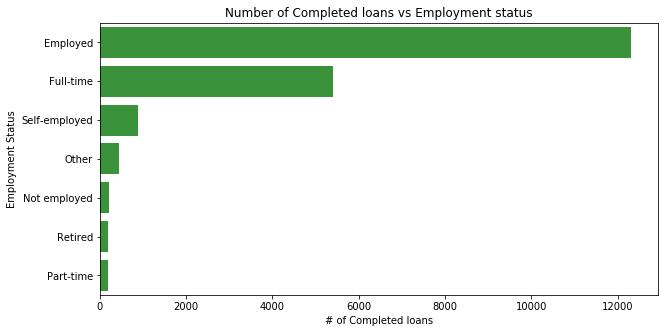

In [5]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[2]
sb.countplot(data = df, y = 'EmploymentStatus', color = base_color, order=df['EmploymentStatus'].value_counts().index)
plt.xlabel('# of Completed loans')
plt.ylabel('Employment Status')
plt.title('Number of Completed loans vs Employment status');


## Completed loans vs types of incomes 
What Are the Income Classes?
And what are the ranges of earnings within each class?
According to Investopedia.com, there are five main income classes:

1) The Upper class
The “upper class” basically means the upper 1% of America. To gain a place in this income class, you need to earn at least $389,436 a year. On average, the upper 1% earns $1.2 million each year.

2) The Upper-Middle class
According to the Census Bureau, 6.1% of households earn $200,000 or more and 14.1% bring in $100,000 to $200,000 a year. This is the upper middle class.

3) The Middle-Middle class
The great majority of people land here, with an income of between $35,000 to $100,000. Of everyone in the United States, 41.5% can honestly say that they are part of the middle-class.

4) The Lower-Middle class
This class earns between $18,871 and $47,100. They straddle the lower-line of poverty and the upper edge of the middle middle class. They’re not technically poor, but they’re dang close…

5) The Poverty Level
The lowest income class is comprised of those that don’t earn enough to meet their basic needs (food, shelter, and clothing). Earning less than $18,871 is an unbelievable 14% of the U.S.



We can see that there are the most completed loans are in the middle middle class. While less are on the Upper-class


Text(0.5,1,'Completed loans by class type')

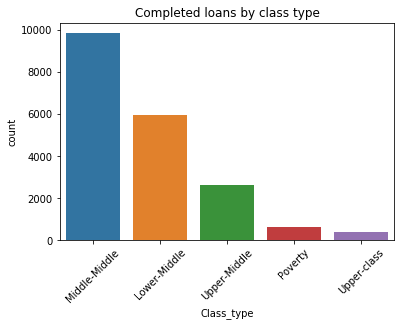

In [6]:
# Plot the borrowers count per class 
bins = [0/12,18871/12,47100/12,100000/12,200000/12,1750003/12]
labels = ['Poverty','Lower-Middle', 'Middle-Middle', 'Upper-Middle', 'Upper-class']
df['Class_type'] = pd.cut(df.StatedMonthlyIncome, bins, labels = labels)
df.Class_type.value_counts()
order = ['Middle-Middle','Lower-Middle','Upper-Middle','Poverty','Upper-class' ]
sb.countplot(x='Class_type', data=df, order=order)
plt.xticks(rotation = 45)
plt.title('Completed loans by class type')



## Multivariate plot.

In this three variable plot we can see on the x axis the class type, while on the y axis we see the loan original amount and each point is the employment status. 

Whis this plot we can see the most completed loans in the employeed plot, then on the full time. While on the not employeed we have only one completed loans. 


Distribution of employed status to class type byLoanOriginalAmount:


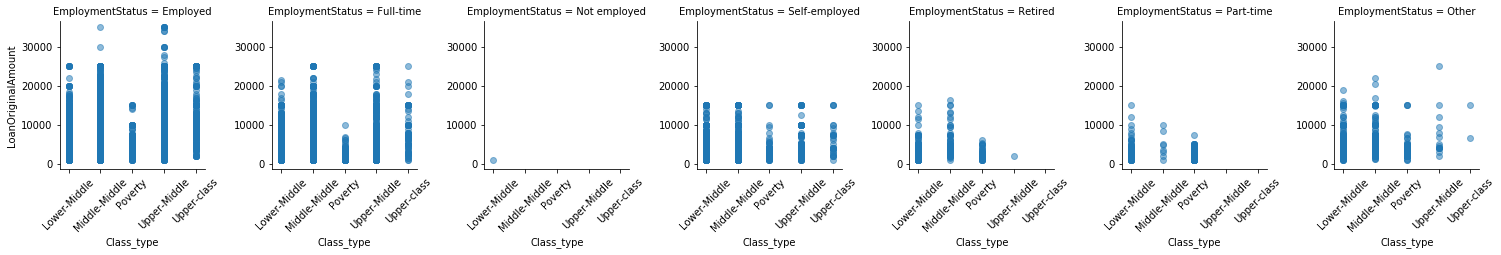

In [7]:
# Get a facegrid for the class types
ctp = df[df['Class_type'] == 'Poverty']

print('Distribution of employed status to class type byLoanOriginalAmount:')
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', margin_titles = True)
g.map(plt.scatter,'Class_type','LoanOriginalAmount', alpha = 0.5)
g.set_xticklabels( rotation=45)
plt.show()


## Three variable plot.

In this three variable plot we have on the x axis the employments status, while the loan original amount on the y axis. Each dot represents the class type that borrowed an y amount while having x status. 

We can observe that almost all dots are in the employeed and full time too. With this information and the past plots we confirm 
that the most completed loans are inside the employeed and full time employement status. We can see that the class types are not that important as the employment status. 


()

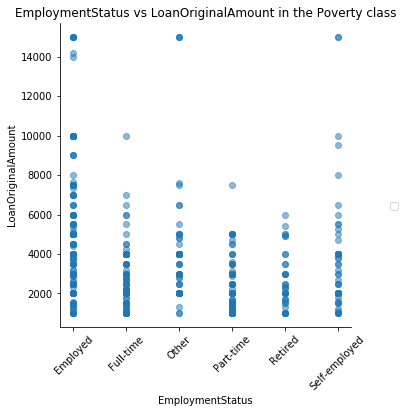

In [8]:
#create a function for eache Class_type
def classtype(classtype):
    ctp = df[df['Class_type'] == classtype]
    g = sb.FacetGrid(data = ctp, size = 5)
    g.map(plt.scatter, 'EmploymentStatus', 'LoanOriginalAmount', alpha = 0.5)
    g.add_legend()
    plt.xticks(rotation = 45)
    plt.title('EmploymentStatus vs LoanOriginalAmount in the {} class'.format(classtype))    
    return()
    
    
classtype('Poverty')


()

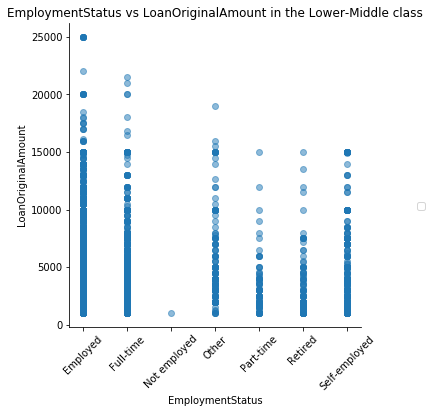

In [9]:
classtype('Lower-Middle')


()

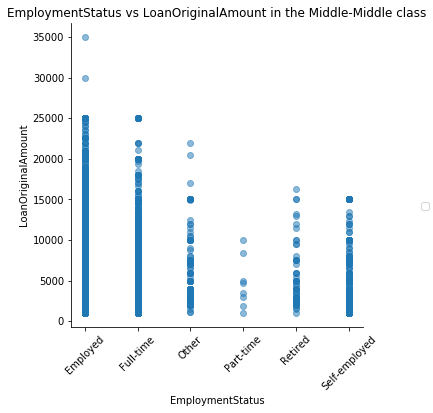

In [10]:
classtype('Middle-Middle')


()

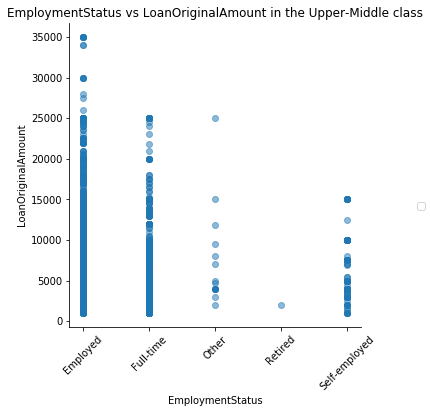

In [11]:
classtype('Upper-Middle')


()

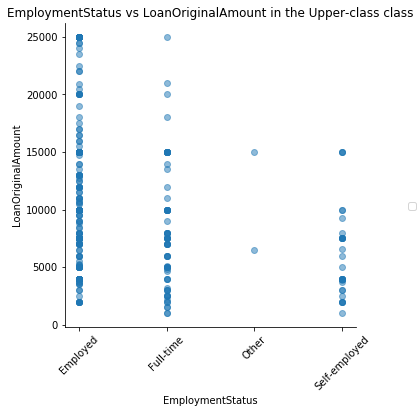

In [12]:
classtype('Upper-class')

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Loans_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Loans_slide_deck.ipynb to slides
[NbConvertApp] Writing 549168 bytes to Loans_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Loans_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
